# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #23 Python Classes and Objects

In [73]:
%run video-00.py

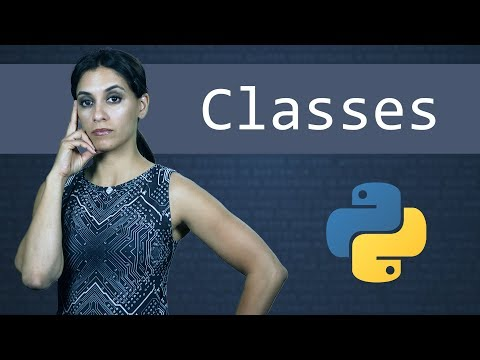

In [74]:
from IPython import display

video = display.YouTubeVideo('apACNr7DC_s')
video
display.HTML(f'<a href="{video.src}">link</a>')

Python supports an [OOP](https://en.wikipedia.org/wiki/Object-oriented_programming) paradigm. It starts with the `class` keyword:

In [75]:
help('class')

Class definitions
*****************

A class definition defines a class object (see section The standard
type hierarchy):

   classdef    ::= [decorators] "class" classname [inheritance] ":" suite
   inheritance ::= "(" [argument_list] ")"
   classname   ::= identifier

A class definition is an executable statement.  The inheritance list
usually gives a list of base classes (see Metaclasses for more
advanced uses), so each item in the list should evaluate to a class
object which allows subclassing.  Classes without an inheritance list
inherit, by default, from the base class "object"; hence,

   class Foo:
       pass

is equivalent to

   class Foo(object):
       pass

The class’s suite is then executed in a new execution frame (see
Naming and binding), using a newly created local namespace and the
original global namespace. (Usually, the suite contains mostly
function definitions.)  When the class’s suite finishes execution, its
execution frame is discarded but its local namespace i

In [76]:
class User:
    pass

We have defined an empty `class` called `User` in the same manner [we defined an empty function](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-12.ipynb):

In [77]:
def f():
    pass

Let us instantiate `User`:

In [78]:
user1 = User()

Just like in the world of JavaScript, in Python, we often compare `dict` with an instance of a class. Fundamentally, it is because an instance of a class has a `__dict__` property:

In [79]:
type(user1.__dict__)
user1.__dict__

dict

{}

In the same manner [we can index-assign 2-tuple pairs](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-15.ipynb) to `dict`, we can dynamically add properties to an instance of a class:

In [80]:
user1.first_name = 'Dave'
user1.__dict__

{'first_name': 'Dave'}

Do remember that we are assigning this property to an _instance_ of `User`. When we instantiate another `User`, the dynamically-added property is not there:

In [81]:
user2 = User()
user2.__dict__

{}

We can also dynamically add functions to an instance of `User`:

In [82]:
user1.my_empty_function = f
user1.my_empty_function() # does nothing, just like `f`
user1.__dict__

{'first_name': 'Dave', 'my_empty_function': <function __main__.f()>}

`.my_empty_function()` is a _method_ of the class instance with [naming coventions](https://www.python.org/dev/peps/pep-0008/) according to Pythonic culture.

To share properties and methods for _all_ instances of a class, they must be defined _within_ the class, making _members_ of the class.

In [83]:
class User:
    def my_empty_function():
        pass

    full_name = None # properties must be initialized to infer a type

    birthday = None  # these properties, by the way, are static and `NoneType`


Now we have defined `User` to be a class with one method and two properties:

In [84]:
user1 = User()
user2 = User()

[member for member in user1.__dir__() if not(member.startswith('_'))]
[member for member in user2.__dir__() if not(member.startswith('_'))]

['my_empty_function', 'full_name', 'birthday']

['my_empty_function', 'full_name', 'birthday']

The properties of `User`, by the way, are _static_ . See “Static Class Methods” below for more detail.

We see that both instances share the same members by looking at `__dir__` [📖 [docs](https://docs.python.org/3/library/functions.html#dir)] instead of `__dict__` [📖 [docs](https://docs.python.org/3/library/stdtypes.html#object.__dict__)]. Both instances have no items in `__dict__` because there are no dynamic members added:

In [85]:
user1.__dict__
user2.__dict__

{}

{}

These ‘dynamic members’ are called _instance attribute references_, [according to the documentation](https://docs.python.org/3/tutorial/classes.html?highlight=class#instance-objects).

The `__dir__` property is used with the `dir()` function which implies the following:

In [86]:
[member for member in dir(user1) if not(member.startswith('_'))]
[member for member in dir(user2) if not(member.startswith('_'))]

['birthday', 'full_name', 'my_empty_function']

['birthday', 'full_name', 'my_empty_function']

### Initializing Class Properties During Construction

The construction or _initialization_ of a class can be defined with special method, `__init__()` [📖 [docs](https://docs.python.org/3/reference/datamodel.html?highlight=__init__#object.__init__)]. The first argument of `__init__()` is `self`, representing the instance of the class. `self` can be used to distinguish class properties from initialization arguments:

In [87]:
class User:
    def __init__(self, full_name, birthday):
        self.full_name = full_name
        self.birthday = birthday

user = User('Dave Bowman', '19710315')

user.full_name
user.birthday

'Dave Bowman'

'19710315'

In [88]:
[member for member in dir(user) if not(member.startswith('_'))]

['birthday', 'full_name']

### `self` Can Be Used As the First Argument of Any Class Method

Let us redefine `User` yet again with a method that returns `full_name` as a tuple of first name and last name:

In [89]:
class User:
    def __init__(self, full_name, birthday):
        self.full_name = full_name
        self.birthday = birthday
    
    def get_name_data(self):
        name_data = self.full_name.split(' ')

        return (name_data[0], name_data[-1])
    
user = User('Dave Bowman', '19710315')
user.get_name_data()

('Dave', 'Bowman')

We see that `self` is used to access other _instance_ members of the class. The properties of our latest definition `User` are _not_ static such that different instances can have different properties. See “Static Class Methods” below for more detail.

### `class` and `object`

Every instance of a class is derived from `object` [📖 [docs](https://docs.python.org/3/reference/compound_stmts.html#class-definitions)] which implies:

In [90]:
class Foo:
    pass

isinstance(Foo(), object)
Foo.__bases__

True

(object,)

is the same as:

In [91]:
class Foo(object):
    pass

isinstance(Foo(), object)
Foo.__bases__

True

(object,)

The latter explicitly declares that Foo [inherits](https://docs.python.org/3/tutorial/classes.html?highlight=inheritance#inheritance) from `object` and the `isinstance()` function [📖 [docs](https://docs.python.org/3/library/functions.html?highlight=type#isinstance)] verifies that both declarations descend from `object`. We have also used the `__bases__` attribute [📖 [docs](https://docs.python.org/3/library/stdtypes.html#class.__bases__)] to explicitly enumerate inheritance.

### Static Class Methods

We have seen how to share properties for each instance of a class with `self`. We have seen how to define static properties in a class. Let’s see this again in one place:

In [92]:
class MyClass:
    def __init__(self, my_instance_property):
        self.my_instance_property = my_instance_property

    def __str__(self): # adding support for `print()`
        return f'''
    my_instance_property: {self.my_instance_property}
    my_static_property: {self.my_static_property}
        '''

    my_static_property = 42

my_instance = MyClass(43)
my_other_instance = MyClass(4.3)

print('my_instance:', my_instance)
print('my_other_instance:', my_other_instance)

print('set static property...\n')
MyClass.my_static_property = 42000

print('my_instance:', my_instance)
print('my_other_instance:', my_other_instance)


my_instance: 
    my_instance_property: 43
    my_static_property: 42
        
my_other_instance: 
    my_instance_property: 4.3
    my_static_property: 42
        
set static property...

my_instance: 
    my_instance_property: 43
    my_static_property: 42000
        
my_other_instance: 
    my_instance_property: 4.3
    my_static_property: 42000
        


What about static methods? This feature is tacked on with the `@staticmethod` decorator [📖 [docs](https://docs.python.org/3/library/functions.html#staticmethod)]:

In [93]:
class MyClass:
    def __init__(self, my_instance_property):
        self.my_instance_property = my_instance_property

    def __str__(self): # adding support for `print()`
        return f'''
    my_instance_property: {self.my_instance_property}
    my_static_property: {self.my_static_property}
        '''

    my_static_property = 42

    @staticmethod
    def my_static_method(x, y):
        return (x + y)


In [94]:
my_instance = MyClass(44)

my_instance.my_static_method(1, 3)
MyClass.my_static_method(1, 1) # static members do not need an instance

4

2

In a static method, by the way, the conventional variable `self` will not represent an instance of the class. It will just be regarded as another variable.

### Define Classes Dynamically with `type()`

Passing three arguments to the `type()` function [📖 [docs](https://docs.python.org/3/library/functions.html?highlight=type#type)] dynamically generates a class instance: 

In [95]:
foo = type('Foo', (object,), {})

isinstance(foo(), object)
foo.__bases__
[m for m in dir(foo) if m.startswith('__di') or not(m.startswith('_'))]

True

(object,)

['__dict__', '__dir__']

We see that `__dir__` has no custom entries because it is based on `object` but it _does_ of course have `__dict__`. This dynamic generation is similar to that of the `object()` function [📖 [docs](https://docs.python.org/3/library/functions.html?highlight=object#object)]:

In [96]:
o = object()
[m for m in dir(o) if m.startswith('__di') or not(m.startswith('_'))]

['__dir__']

But here we have `o` _without_ `__dict__`:

>`object` does not have a `__dict__`, so you can’t assign arbitrary attributes to an instance of the object class.

Now let us fill `__dir__` with `type()` using the members of `MyClass`:

In [97]:
my_class = type(MyClass.__name__, (MyClass,), { 'cat_in_the_bag': 'meow' })

my_class.__bases__
[m for m in dir(my_class) if m.startswith('__di') or not(m.startswith('_'))]

(__main__.MyClass,)

['__dict__',
 '__dir__',
 'cat_in_the_bag',
 'my_static_method',
 'my_static_property']

Some bits of interest here:

- `my_class.__bases__` does not return `object` suggesting [Python supports “a form” of multiple inheritance](https://docs.python.org/3/tutorial/classes.html?highlight=multiple%20inheritance#multiple-inheritance)
- only the static members of `MyClass` are found in `__dir__`

Let us set instances from the dynamic class:

In [100]:
my_instance = my_class(46)
my_other_instance = my_class(47)

print('my_instance:', my_instance)
my_instance.cat_in_the_bag

print('my_other_instance:', my_other_instance)
my_other_instance.cat_in_the_other_bag = 'meow, meow'

my_other_instance.cat_in_the_bag
my_other_instance.cat_in_the_other_bag

my_instance: 
    my_instance_property: 46
    my_static_property: 42
        


'meow'

my_other_instance: 
    my_instance_property: 47
    my_static_property: 42
        


'meow'

'meow, meow'

We see that the `dict` argument in `type` can _share_ arbitrary attributes across multiple instances, adding quite a bit of nuance to this lengthy topic.